In [48]:
# %pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

In [2]:
clean_annotations_path = "/mnt/humpbackwhales/data/preprocessed/annotations_clean.csv"

In [4]:
annotations = pd.read_csv(clean_annotations_path)
annotations.head()

,Selection,BeginTime,EndTime,LowFreq,HighFreq,CallType,Filename,Duration
0,1,245.992197,247.366463,263.518,2845.995,Descending_moan,211026-133018-OS-humpback-47min-clip.flac,1.374266
1,2,253.276801,257.038976,263.518,1791.923,Descending_moan,211026-133018-OS-humpback-47min-clip.flac,3.762175
2,3,259.368406,259.836241,2898.699,3531.142,Whistle,211026-133018-OS-humpback-47min-clip.flac,0.467835
3,4,262.101362,264.849895,158.111,1844.626,Descending_moan,211026-133018-OS-humpback-47min-clip.flac,2.748532
4,5,266.721236,267.578934,1106.776,3056.809,Whistle,211026-133018-OS-humpback-47min-clip.flac,0.857698


# Duration Analysis

In [6]:
annotations.value_counts('CallType')  

CallType
Whup               225
Grunt              215
Ascending_moan     192
Moan               168
Growl              132
Chirp              102
Upsweep             84
Shriek              78
Buzz                62
Descending_moan     50
Cry                 38
Trumpet             35
Bellow              33
Creak               30
Pop                 29
Thwop               15
Whistle             11
Vibrate              4
Harmonica            3
Sigh                 2
Unknown_1            2
Piccalo              1
Bark                 1
Downsweep            1
Knock                1
Name: count, dtype: int64

<Axes: xlabel='Duration', ylabel='Count'>

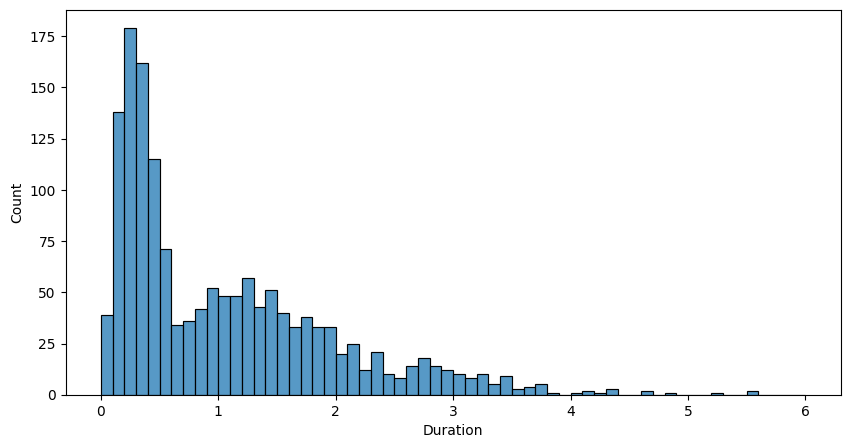

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(annotations, x='Duration', binwidth=0.1, binrange=[0, 6])

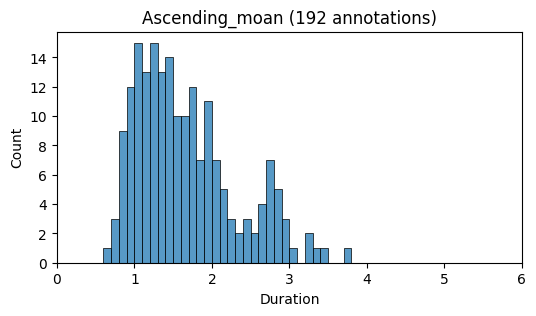

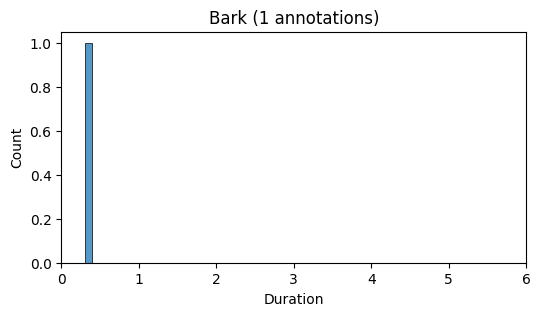

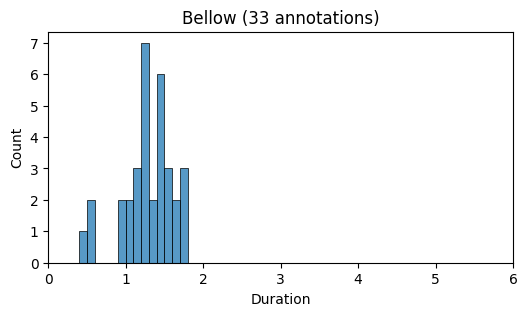

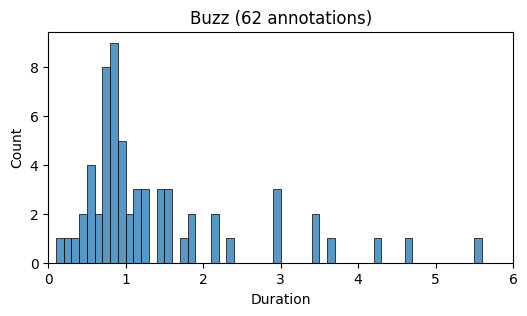

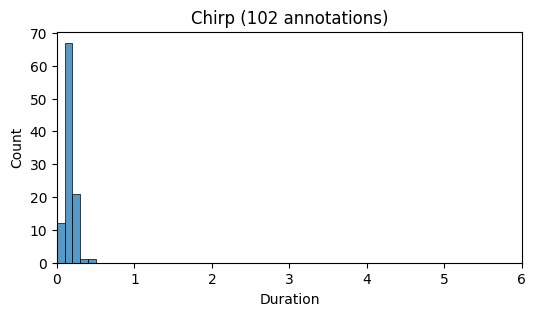

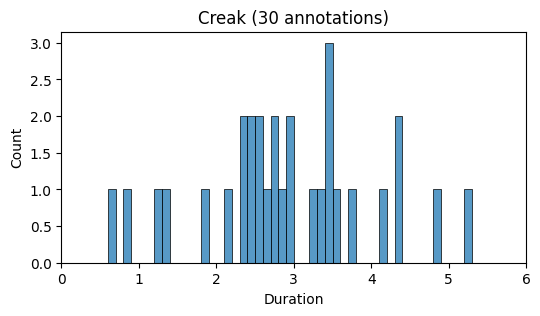

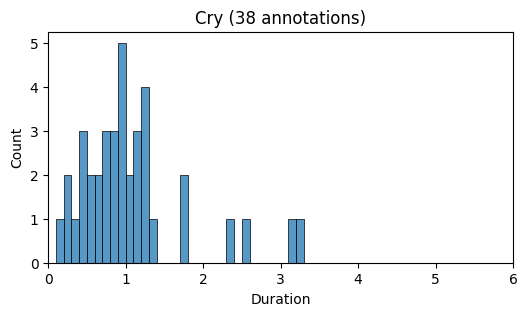

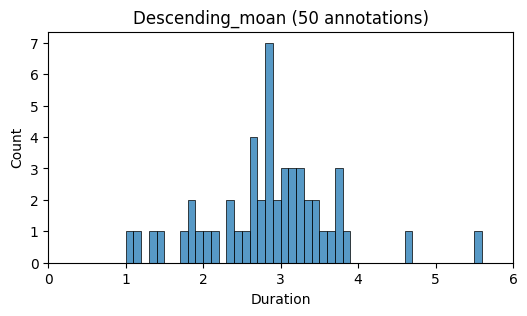

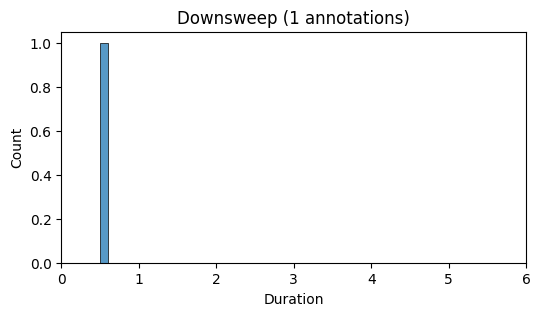

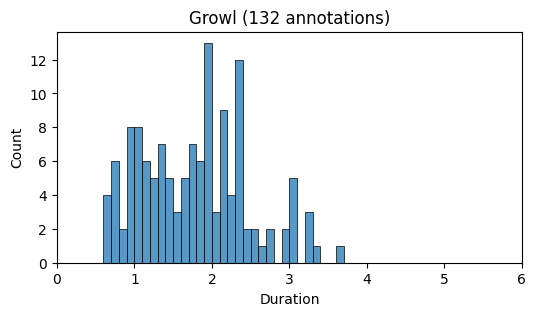

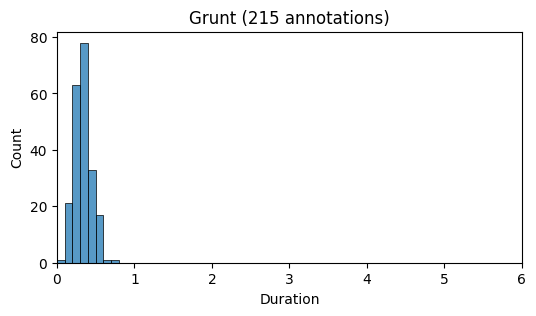

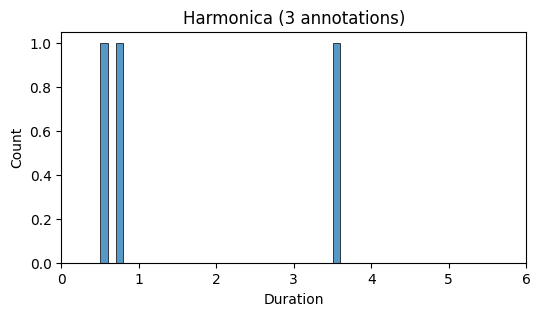

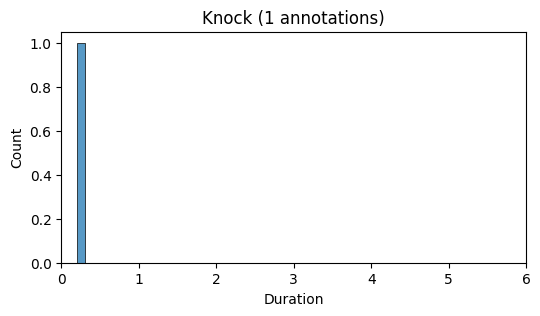

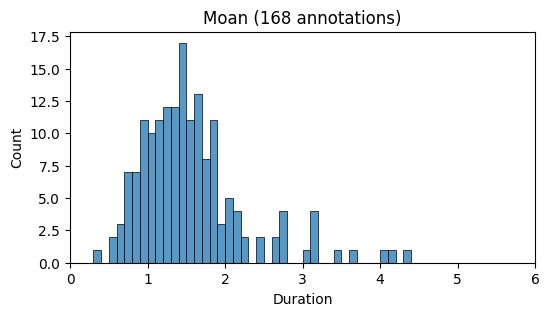

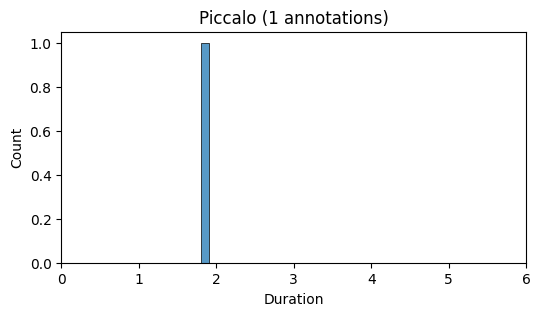

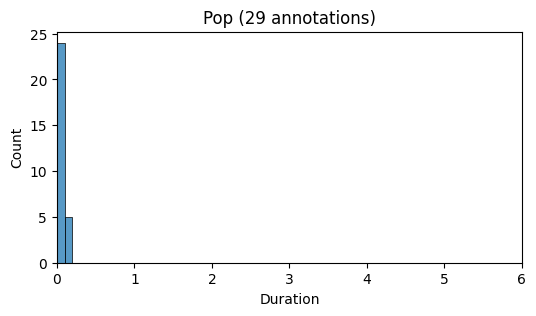

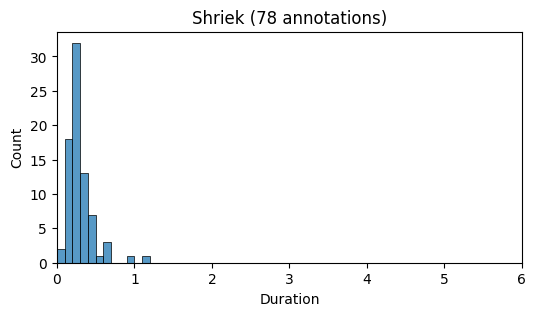

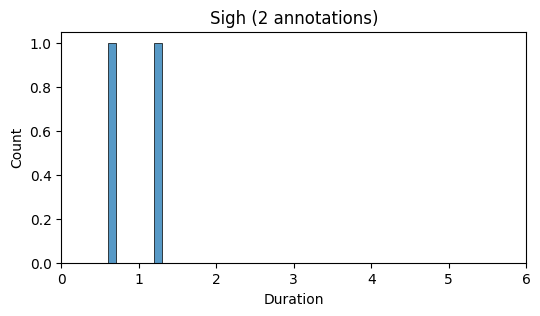

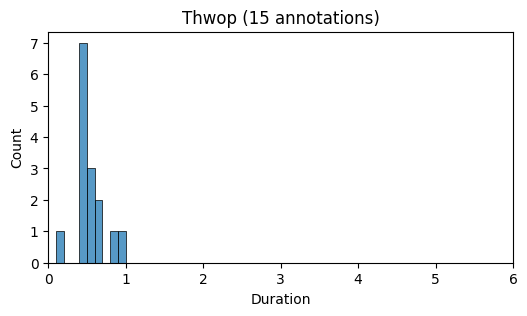

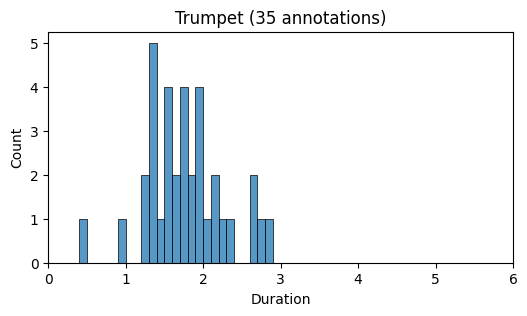

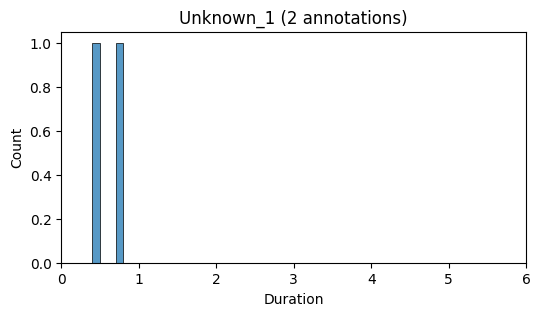

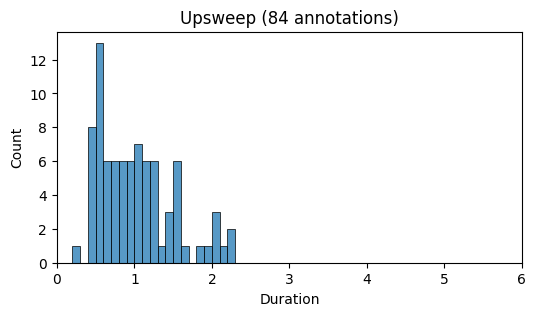

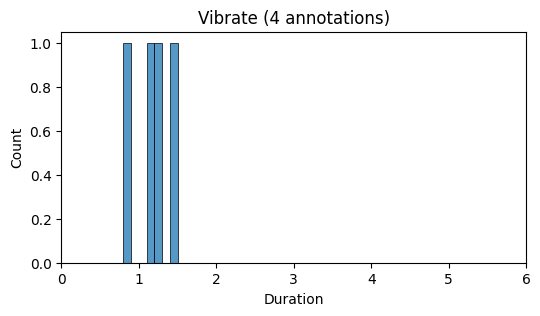

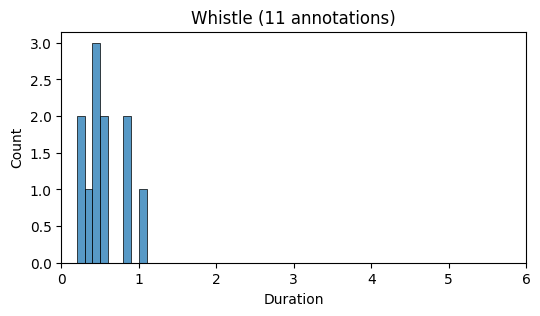

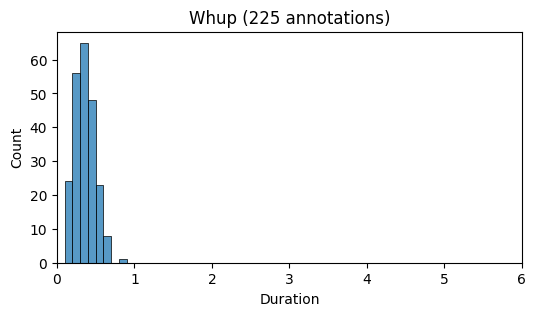

In [8]:
for call_type, annotations_call in annotations.groupby('CallType'):
    plt.figure(figsize=(6, 3))
    sns.histplot(data=annotations_call, x='Duration', binwidth=0.1, binrange=[0, 6]).set_title(f'{call_type} ({len(annotations_call)} annotations)')
    plt.xlim(0, 6)
    plt.show()

# Frequencies analysis

In [5]:
annotations

,Selection,BeginTime,EndTime,LowFreq,HighFreq,CallType,Filename,Duration
0,1,245.992197,247.366463,263.518,2845.995,Descending_moan,211026-133018-OS-humpback-47min-clip.flac,1.374266
1,2,253.276801,257.038976,263.518,1791.923,Descending_moan,211026-133018-OS-humpback-47min-clip.flac,3.762175
2,3,259.368406,259.836241,2898.699,3531.142,Whistle,211026-133018-OS-humpback-47min-clip.flac,0.467835
3,4,262.101362,264.849895,158.111,1844.626,Descending_moan,211026-133018-OS-humpback-47min-clip.flac,2.748532
4,5,266.721236,267.578934,1106.776,3056.809,Whistle,211026-133018-OS-humpback-47min-clip.flac,0.857698
...,...,...,...,...,...,...,...,...
1509,185,1519.814451,1520.349041,364.798,2067.187,Upsweep,OS_10_28_2021_20_25_00_HB.flac,0.534590
1510,186,1528.112146,1529.034576,405.331,1864.522,Upsweep,OS_10_28_2021_20_25_00_HB.flac,0.922430
1511,187,1600.720112,1601.118433,324.265,1864.522,Shriek,OS_10_28_2021_20_25_00_HB.flac,0.398321
1512,188,1731.537731,1733.592234,283.732,1215.993,Descending_moan,OS_10_28_2021_20_25_00_HB.flac,2.054503


<Axes: xlabel='LowFreq', ylabel='Count'>

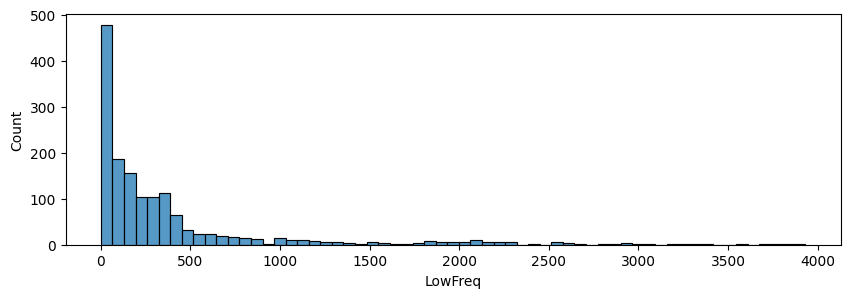

In [47]:
plt.figure(figsize=(10, 3))
sns.histplot(annotations, x='LowFreq')

<Axes: xlabel='HighFreq', ylabel='Count'>

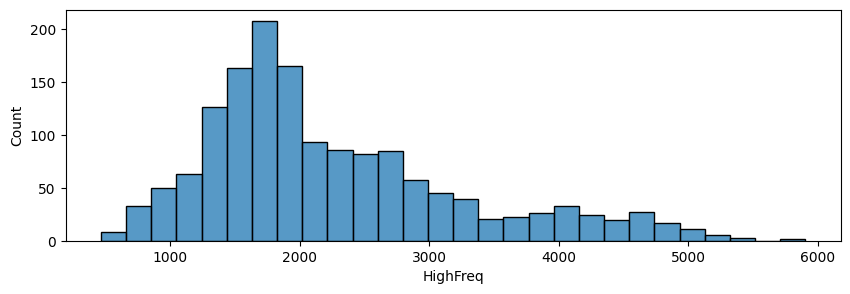

In [48]:
plt.figure(figsize=(10, 3))
sns.histplot(annotations, x='HighFreq')

<Axes: xlabel='LowFreq', ylabel='HighFreq'>

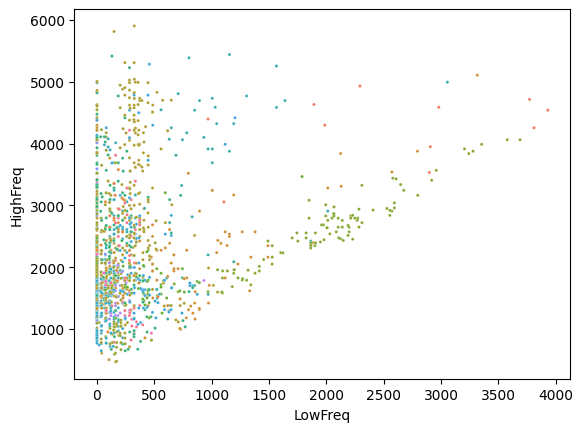

In [56]:
sns.scatterplot(annotations, x='LowFreq', y='HighFreq', hue='CallType', s=5, legend=False)

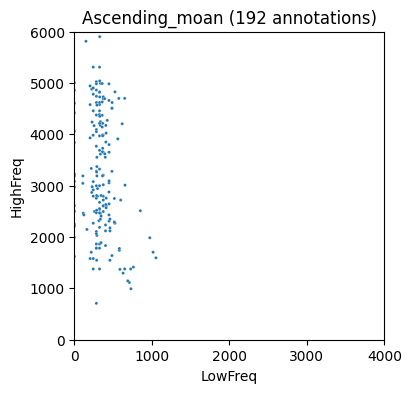

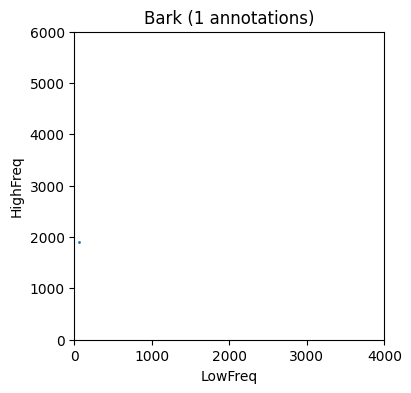

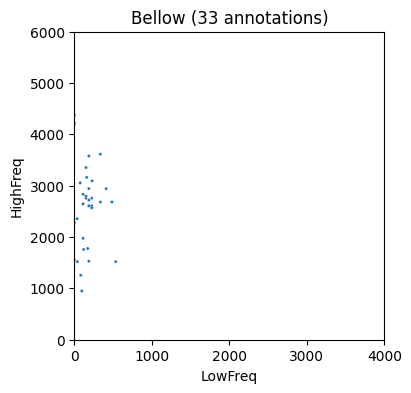

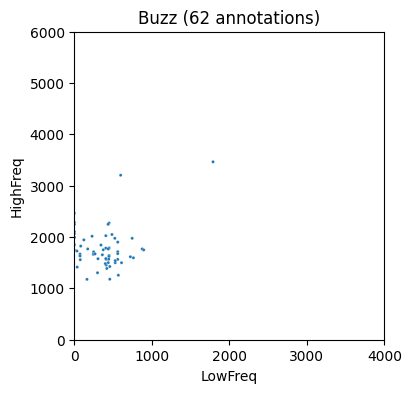

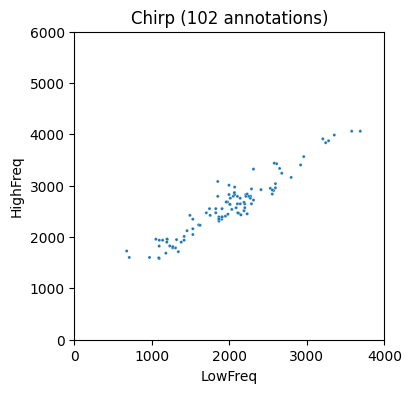

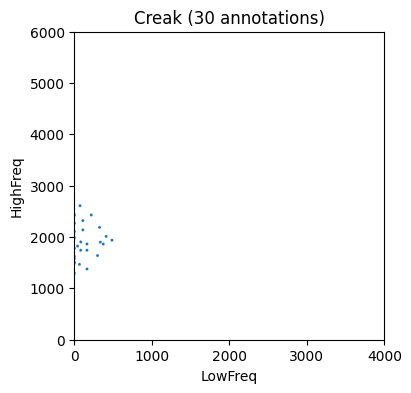

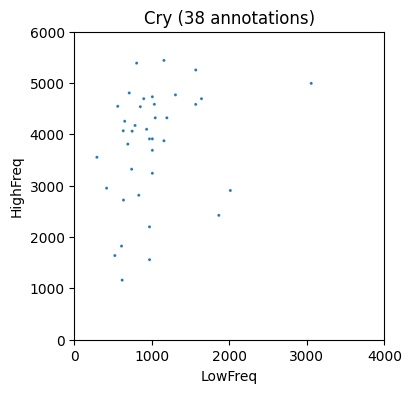

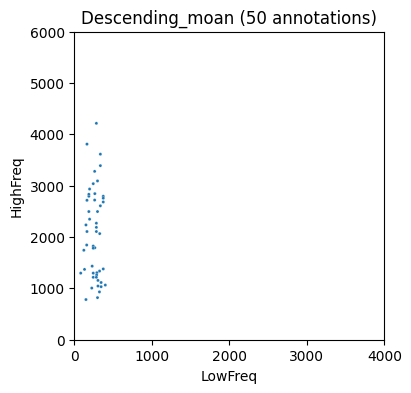

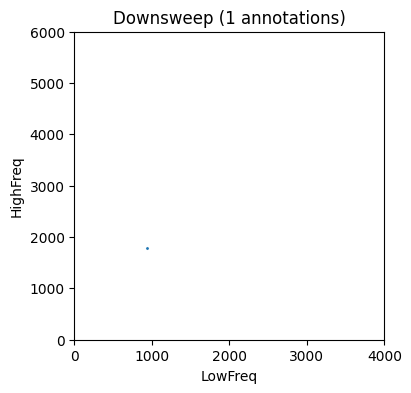

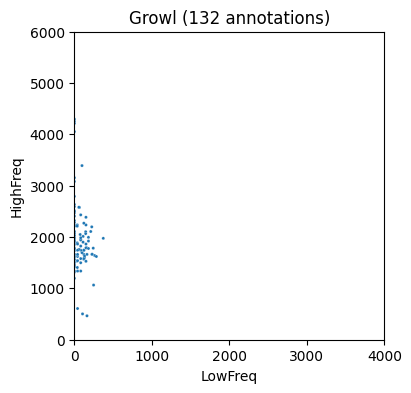

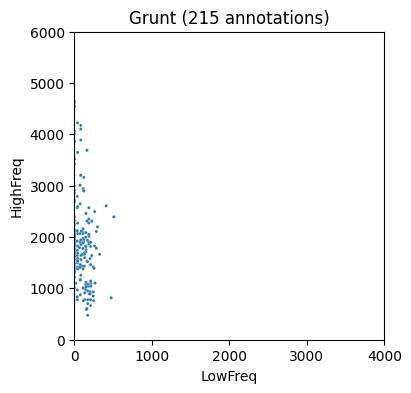

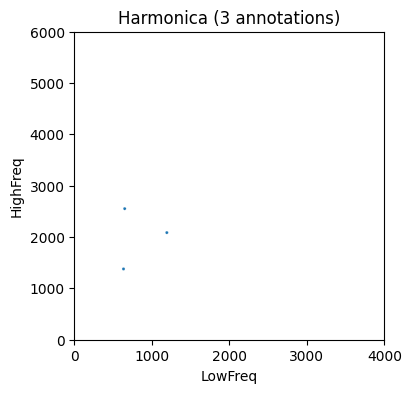

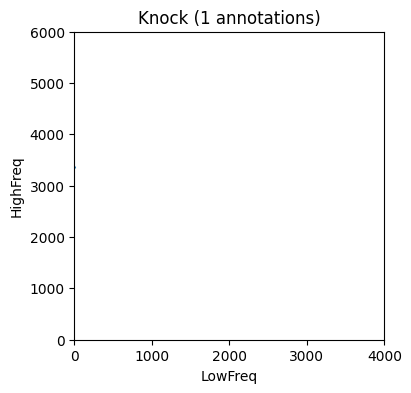

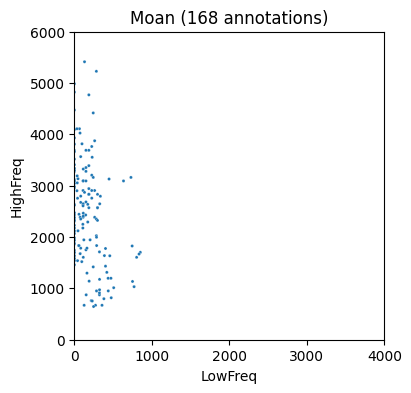

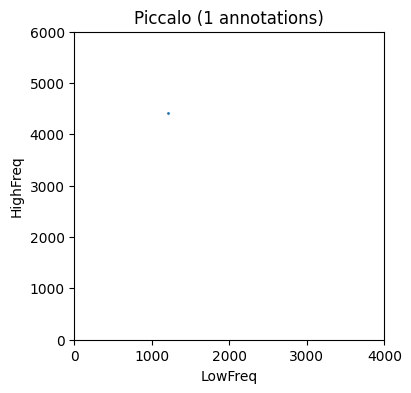

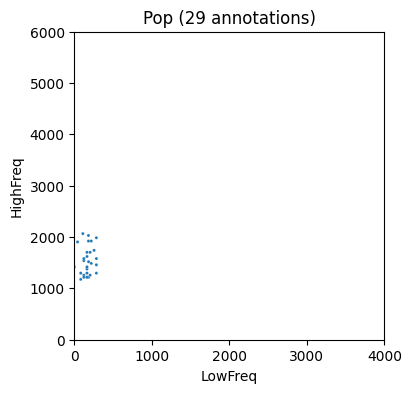

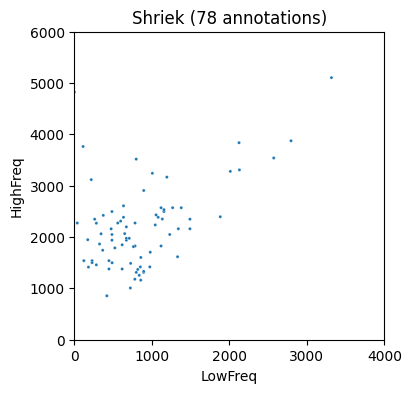

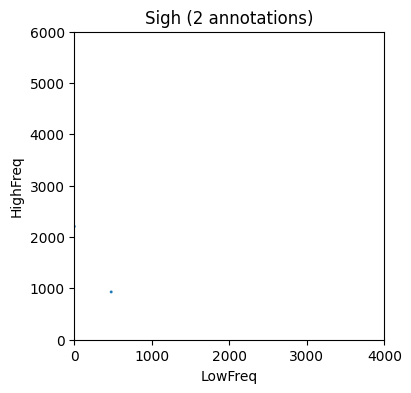

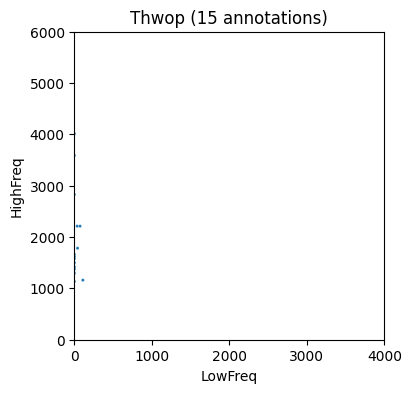

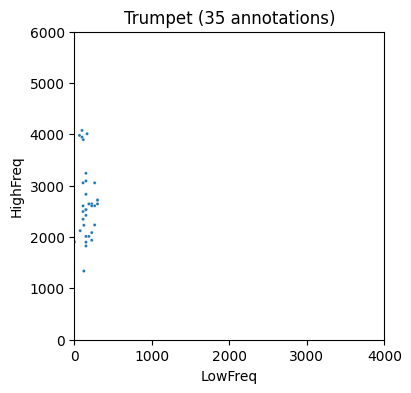

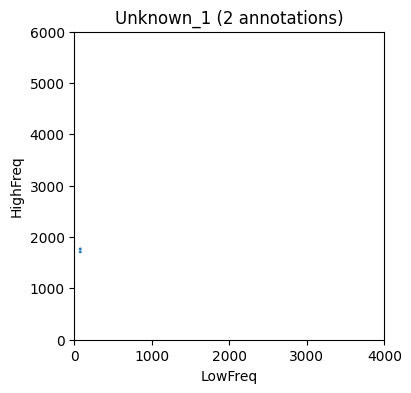

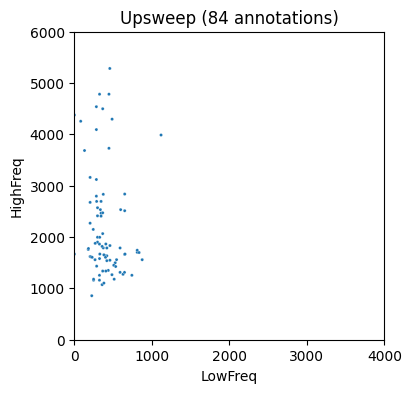

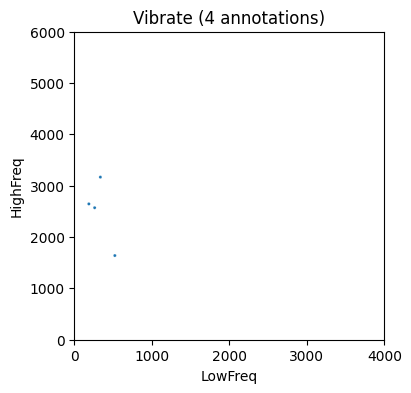

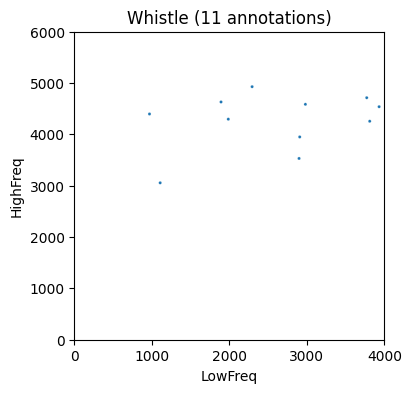

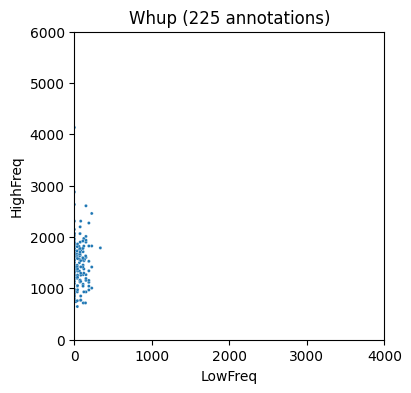

In [59]:
for call_type, annotations_call in annotations.groupby('CallType'):
    plt.figure(figsize=(4, 4))
    sns.scatterplot(annotations_call, x='LowFreq', y='HighFreq', hue='CallType', s=5, legend=False).set_title(f'{call_type} ({len(annotations_call)} annotations)')
    plt.xlim(0, 4_000)
    plt.ylim(0, 6_000)
    plt.show()